# Data & Functions

In [1]:
from featurelists import lime_list, lime_list_xgb2, shap_list, shap_list_xgb2, xgb_list, check

In [2]:
check

'check_0624_2'

In [3]:
import numpy as np

def perturb(df, col_list, mean, std_fix = 0, std_spec = 0, seed=None):
    df = df.copy()
    if seed is not None:
        np.random.seed(seed)
    for col in col_list:
        if std_spec:
            df[col] = df[col] + np.random.normal(mean, np.std(df[col])*std_spec, len(df))
        else:
            df[col] = df[col] + np.random.normal(mean, std_fix, len(df))
    return df


def PGI(data, model, collist, mean, std_fix = 0, std_spec = 0, seed=None):
    data_perturb = perturb(data, collist, mean, std_fix, std_spec, seed)
    try:
        y_pred = model.predict(data)
    except:
        y_pred = model.predict(data.values) 
    y_pred_perturb = model.predict(data_perturb)
    return np.mean(np.abs(y_pred_perturb - y_pred))

In [4]:
from model_function import Load_Model
import pandas as pd

X_train = pd.DataFrame(Load_Model("X_train"), columns = Load_Model("features"))
X_test = pd.DataFrame(Load_Model("X_test"), columns = Load_Model("features"))
model = Load_Model('xgb_model')

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A valu

# AUCs

3.665057685226202


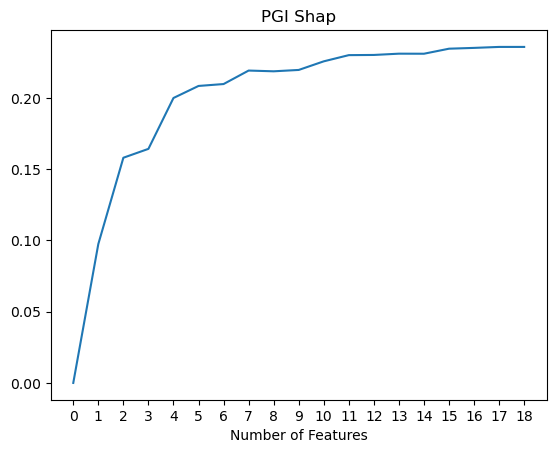

In [5]:
import warnings
warnings.filterwarnings('ignore')

PGI_shap = []
for k in range(len(shap_list)+1):
    # print(shap_list[:k])
    p = PGI(X_test, model, shap_list[:k], 0, std_fix=0.1, seed = 0)
    PGI_shap.append(p)

# calculate AUC for PGI
from sklearn.metrics import auc
import matplotlib.pyplot as plt
plt.plot(PGI_shap)
plt.xlabel('Number of Features')
plt.title("PGI Shap")
plt.xticks(range(len(PGI_shap)), list(range(0,19)))


print(auc(np.arange(len(PGI_shap)), PGI_shap)	)

3.62492398545146


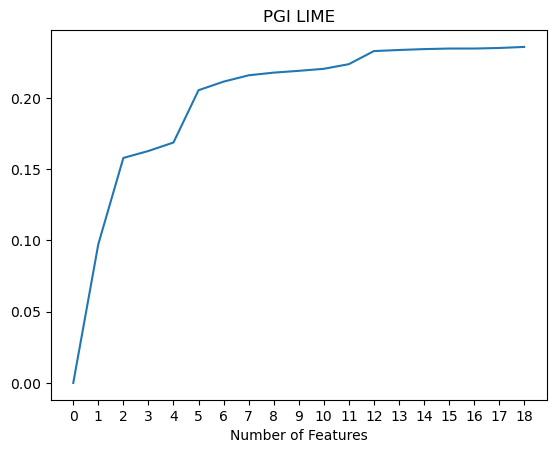

In [6]:
PGI_lime = []
for k in range(len(lime_list)+1):
    p = PGI(X_test, model, lime_list[:k], 0, std_fix=0.1, seed = 0)
    PGI_lime.append(p)

# calculate AUC for PGI
from sklearn.metrics import auc
import matplotlib.pyplot as plt
plt.plot(PGI_lime)
plt.xlabel('Number of Features')
plt.title("PGI LIME")
plt.xticks(range(len(PGI_lime)), list(range(0,19)))


print(auc(np.arange(len(PGI_lime)), PGI_lime)	)

([<matplotlib.axis.XTick at 0x1906afd3e90>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18')])

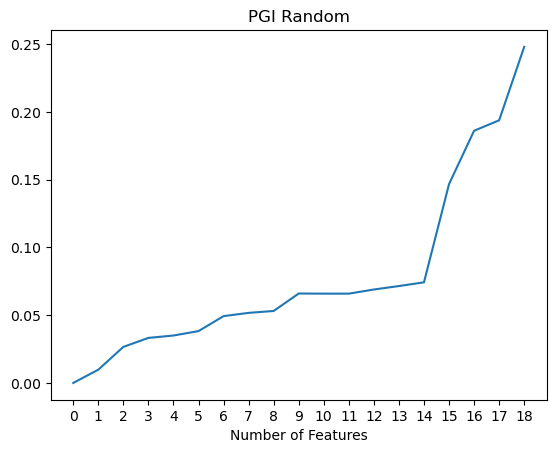

In [7]:
# shuffle feature list randomly
n= 1
PGI_lists = []
for i in range(n):
    random_list = Load_Model("features")

    import random
    random.seed(i+5)
    random.shuffle(random_list)
    random_list
    random.shuffle(random_list)

    PGI_random = []
    for k in range(len(random_list)+1):
        p = PGI(X_test, model, random_list[:k], 0, std_fix=0.1, seed = 0)
        PGI_random.append(p)
    PGI_lists.append(PGI_random)

PGI_random = np.mean(PGI_lists, axis = 0)
# plot
plt.plot(PGI_random)
plt.xlabel('Number of Features')
plt.title("PGI Random")
plt.xticks(range(len(PGI_random)), list(range(0,19)))


# Comparison Graphs

## PGI

In [8]:
def auc_PGI(feature_list, data, model, mean = 0, std_fix = 0, std_spec = 0, seed=None, label = None, color = None):
    PGI_list = []
    for k in range(len(feature_list)+1):
        p = PGI(data, model, feature_list[:k], mean, std_fix = std_fix, std_spec = std_spec, seed=seed)
        PGI_list.append(p)
    a = (auc(range(len(PGI_list)), PGI_list))
    if color:
        plt.plot(PGI_list, label = "{} (AUC: {:.3f})".format(label, a), color = color)
    else:
        plt.plot(PGI_list, label = "{} (AUC: {:.3f})".format(label, a))
    plt.xlabel('Number of Features') 
    plt.xticks(range(len(PGI_list)), list(range(0,19)))
    if label:
        plt.legend()

In [88]:
import random
random_list = Load_Model("features")
random.seed(42)
random.shuffle(random_list)
random_list

['urban',
 'with_coast',
 'rainfall_max_24h',
 'std_tri',
 'rwi',
 'std_slope',
 'total_pop',
 'mean_slope',
 'mean_elev',
 'water',
 'track_distance',
 'coast_length',
 'total_houses',
 'rural',
 'percent_houses_damaged_5years',
 'mean_tri',
 'wind_speed',
 'rainfall_max_6h']

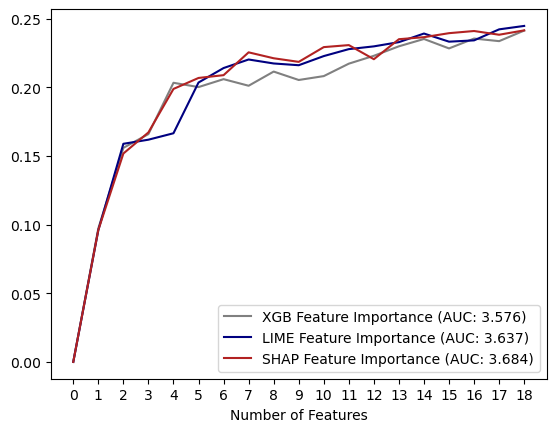

In [89]:
# simple model
auc_PGI(xgb_list, X_train, model, 0, std_fix=0.1, seed = None, label = "XGB Feature Importance", color='gray')
auc_PGI(lime_list, X_train, model, 0, std_fix=0.1, seed = None, label= "LIME Feature Importance", color='navy')
auc_PGI(shap_list, X_train, model, 0, std_fix=0.1, seed = None, label= "SHAP Feature Importance",color='firebrick')
plt.legend(loc='lower right')

Text(0.5, 0, 'Number of Features')

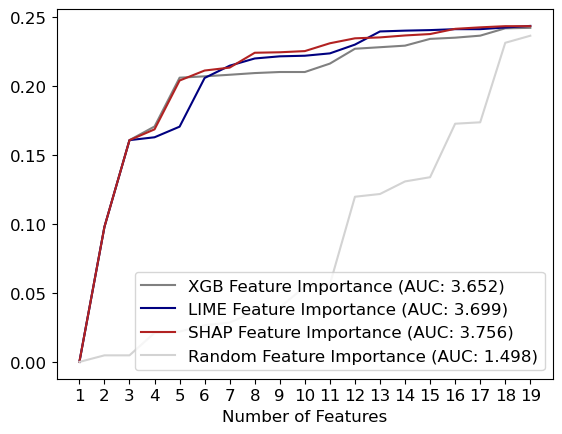

In [124]:
# constant seed 
auc_PGI(xgb_list, X_train, model, 0, std_fix=0.1, seed = 0, label = "XGB Feature Importance", color='gray')
auc_PGI(lime_list, X_train, model, 0, std_fix=0.1, seed = 0, label= "LIME Feature Importance", color='navy')
auc_PGI(shap_list, X_train, model, 0, std_fix=0.1, seed = 0, label= "SHAP Feature Importance",color='firebrick')
auc_PGI(random_list, X_train, model, 0, std_fix=0.1, seed = 0, label = "Random Feature Importance", color='lightgray')

plt.legend(loc='lower right', fontsize = 12)
plt.xticks(range(19), list(range(1,20)), fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Number of Features", fontsize = 12)

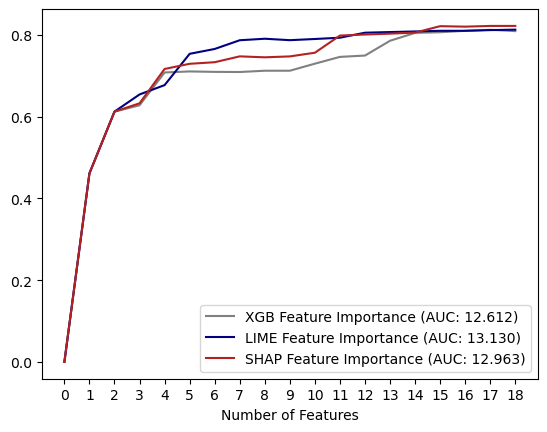

In [11]:
# higher perturbation
auc_PGI(xgb_list, X_train, model, 0, std_fix=0.5, seed = 0, label = "XGB Feature Importance", color='gray')
auc_PGI(lime_list, X_train, model, 0, std_fix=0.5, seed = 0, label= "LIME Feature Importance", color='navy')
auc_PGI(shap_list, X_train, model, 0, std_fix=0.5, seed = 0, label= "SHAP Feature Importance",color='firebrick')

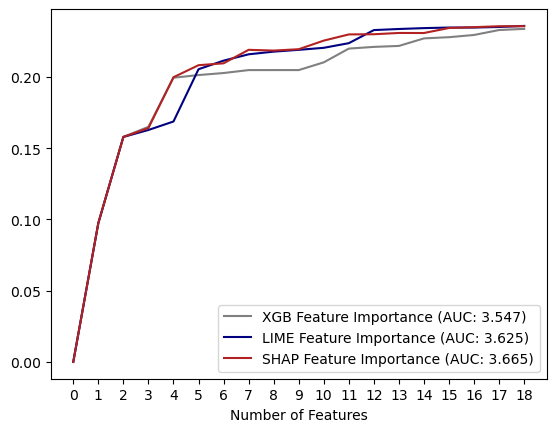

In [12]:
# on test set
auc_PGI(xgb_list, X_test, model, 0, std_fix=0.1, seed = 0, label = "XGB Feature Importance", color='gray')
auc_PGI(lime_list, X_test, model, 0, std_fix=0.1, seed = 0, label= "LIME Feature Importance", color='navy')
auc_PGI(shap_list, X_test, model, 0, std_fix=0.1, seed = 0, label= "SHAP Feature Importance",color='firebrick')

Text(0.5, 0, 'Feature Importance')

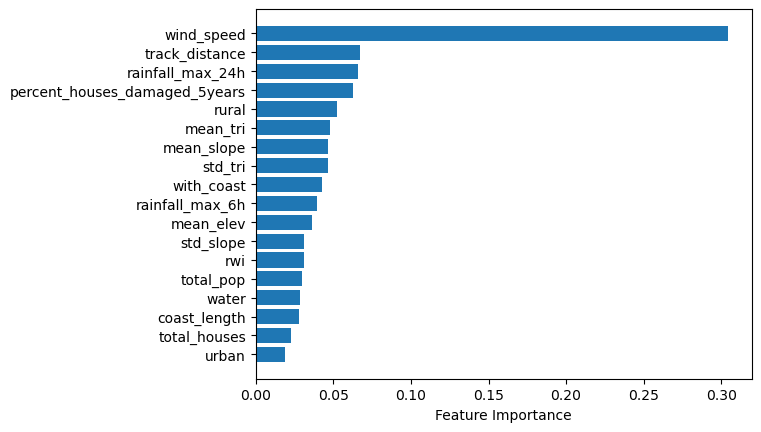

In [92]:
model.feature_importances_
# order by importance
importance = model.feature_importances_
feature = Load_Model('features')
sorted_idx = np.argsort(importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature)[sorted_idx])
plt.xlabel('Feature Importance')

## Permutation by switching values within columns

In [14]:
## Perturb with random value
import numpy as np

def perturb_random(df, col_list, mean, std_fix = 0, std_spec = 0, seed=None):
    df = df.copy()
    if seed is not None:
        np.random.seed(seed)
    for col in col_list:
        # random reorder of the column
        df[col] = np.random.permutation(df[col])
    return df

def PGI_switch(data, model, collist, mean, std_fix = 0, std_spec = 0, seed=None):
    data_perturb = perturb_random(data, collist, mean, std_fix, std_spec, seed)
    try:
        y_pred = model.predict(data)
    except:
        y_pred = model.predict(data.values) 
    y_pred_perturb = model.predict(data_perturb)
    return np.mean(np.abs(y_pred_perturb - y_pred))

def auc_PGI_switch(feature_list, data, model, mean = 0, std_fix = 0, std_spec = 0, seed=None, label = None):
    PGI_list = []
    for k in range(len(feature_list)):
        p = PGI_switch(data, model, feature_list[:k], mean, std_fix = std_fix, std_spec = std_spec, seed=None)
        PGI_list.append(p)
    a = (auc(range(len(PGI_list)), PGI_list))
    plt.plot(PGI_list, label = "{} (AUC: {:.3f})".format(label, a))
    plt.xlabel('Number of Features')
    plt.xticks(range(len(PGI_list)), list(range(1,19)))
    if label:
        plt.legend()

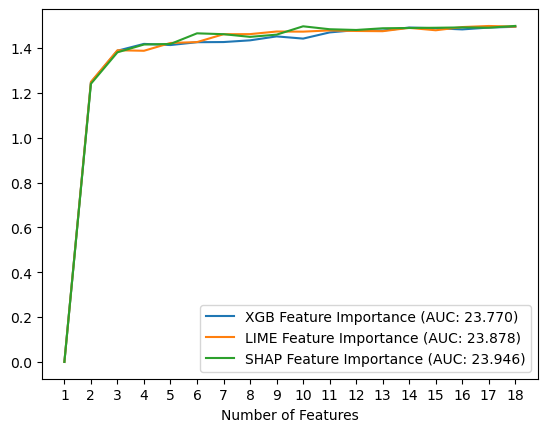

In [15]:
auc_PGI_switch(xgb_list, X_train, model, 0, std_fix=0.1, seed = 0, label = "XGB Feature Importance")
auc_PGI_switch(lime_list, X_train, model, 0, std_fix=0.1, seed = 0, label= "LIME Feature Importance")
auc_PGI_switch(shap_list, X_train, model, 0, std_fix=0.1, seed = 0, label= "SHAP Feature Importance")

## Perturbation: Mean substitution

In [16]:
import numpy as np

def auc_PGI_mean(feature_list, data, model, mean = 0, std_fix = 0, std_spec = 0, seed=None, label = None):
    def PGI_switch(data, model, collist, mean, std_fix = 0, std_spec = 0, seed=None):
        def perturb_random(df, col_list, mean, std_fix = 0, std_spec = 0, seed=None):
            df = df.copy()
            if seed is not None:
                np.random.seed(seed)
            for col in col_list:
                # substitute column values with mean
                df[col] = np.array(df[col].mean()*np.ones(len(df)))
            return df
        
        data_perturb = perturb_random(data, collist, mean, std_fix, std_spec, seed)
        try:
            y_pred = model.predict(data)
        except:
            y_pred = model.predict(data.values) 
        y_pred_perturb = model.predict(data_perturb)
        return np.mean(np.abs(y_pred_perturb - y_pred))
    
    
    
    PGI_list = []
    for k in range(len(feature_list)):
        p = PGI_switch(data, model, feature_list[:k], mean, std_fix = std_fix, std_spec = std_spec, seed=None)
        PGI_list.append(p)
    a = (auc(range(len(PGI_list)), PGI_list))
    plt.plot(PGI_list, label = "{} (AUC: {:.3f})".format(label, a))
    plt.xlabel('Number of Features')
    plt.xticks(range(len(PGI_list)), list(range(1,19)))
    if label:
        plt.legend()


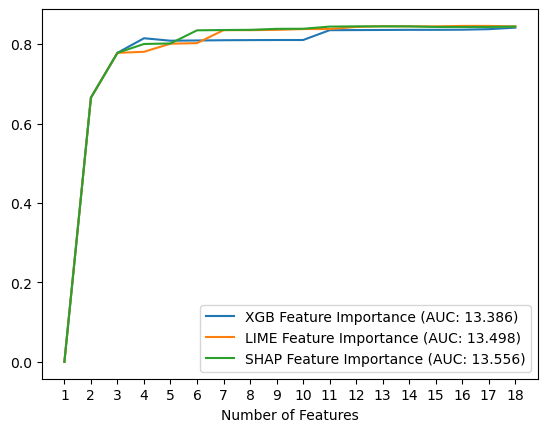

In [17]:
auc_PGI_mean(xgb_list, X_train, model, 0, std_fix=0.1, seed = 0, label = "XGB Feature Importance")
auc_PGI_mean(lime_list, X_train, model, 0, std_fix=0.1, seed = 0, label= "LIME Feature Importance")
auc_PGI_mean(shap_list, X_train, model, 0, std_fix=0.1, seed = 0, label= "SHAP Feature Importance")

## PGU

Text(0.5, 0, 'Number of Features')

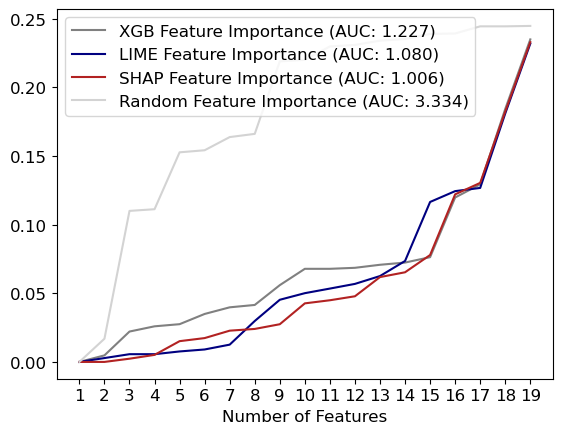

In [127]:
auc_PGI(xgb_list[::-1], X_train, model, 0, std_fix=0.1, seed = 0, label = "XGB Feature Importance", color='gray')
auc_PGI(lime_list[::-1], X_train, model, 0, std_fix=0.1, seed = 0, label= "LIME Feature Importance", color='navy')
auc_PGI(shap_list[::-1], X_train, model, 0, std_fix=0.1, seed = 0, label= "SHAP Feature Importance", color='firebrick')
auc_PGI(random_list[::-1], X_train, model, 0, std_fix=0.1, seed = 0, label = "Random Feature Importance", color='lightgray')
#plt.title("PGU Comparison")
#plt.ylabel("PGU")

plt.legend(loc='upper left', fontsize = 12)
plt.xticks(range(19), list(range(1,20)), fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Number of Features", fontsize = 12)

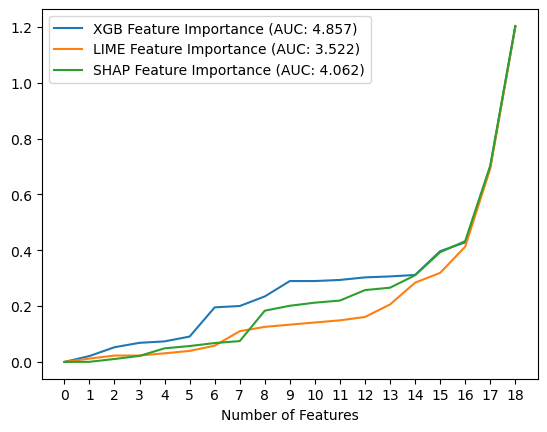

In [19]:
# higher perturbation
auc_PGI(xgb_list[::-1], X_train, model, 0, std_fix=0.7, seed = 0, label = "XGB Feature Importance")
auc_PGI(lime_list[::-1], X_train, model, 0, std_fix=0.7, seed = 0, label= "LIME Feature Importance")
auc_PGI(shap_list[::-1], X_train, model, 0, std_fix=0.7, seed = 0, label= "SHAP Feature Importance")

# Two-Stage Model

In [20]:
#from models import TwoStageXGB
from model_function import TwoStageXGB
from model_function import Load_Model

y_train = Load_Model('y_train')

xgb2sg = TwoStageXGB()
xgb2sg.fit(X_train, y_train)

Text(0.5, 0, 'Number of Features')

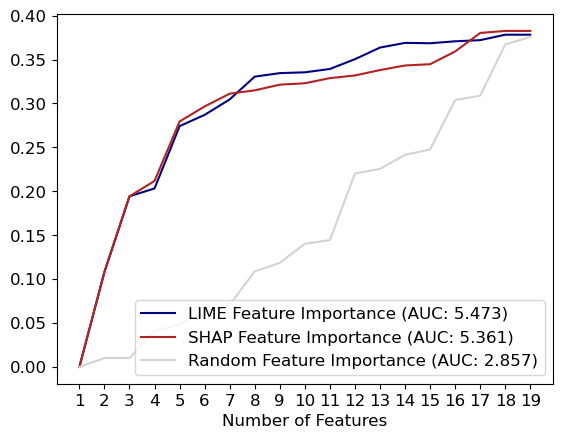

In [123]:
auc_PGI(lime_list_xgb2, X_train, xgb2sg, 0, std_fix=0.1, seed = 0, label= "LIME Feature Importance", color='navy')
auc_PGI(shap_list_xgb2, X_train, xgb2sg, 0, std_fix=0.1, seed = 0, label= "SHAP Feature Importance",color='firebrick')
auc_PGI(random_list, X_train, xgb2sg, 0, std_fix=0.1, seed = 0, label= "Random Feature Importance",color='lightgray')

plt.legend(loc='lower right', fontsize = 12)
plt.xticks(range(19), list(range(1,20)), fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Number of Features", fontsize = 12)

In [97]:
shap_list_xgb2

['wind_speed',
 'track_distance',
 'rainfall_max_6h',
 'percent_houses_damaged_5years',
 'rainfall_max_24h',
 'mean_elev',
 'urban',
 'mean_slope',
 'coast_length',
 'mean_tri',
 'std_slope',
 'rwi',
 'rural',
 'std_tri',
 'total_houses',
 'total_pop',
 'water',
 'with_coast']

Text(0.5, 0, 'Number of Features')

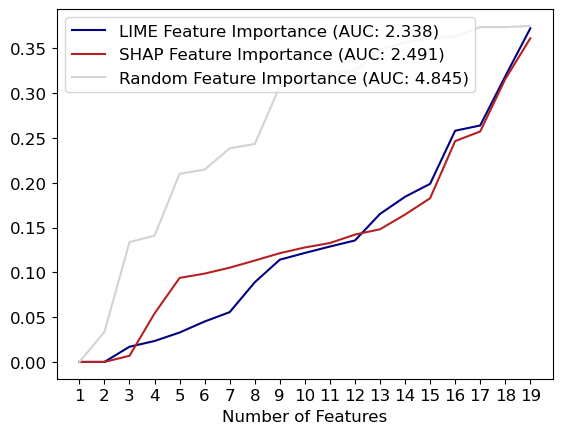

In [122]:
auc_PGI(lime_list_xgb2[::-1], X_train, xgb2sg, 0, std_fix=0.1, seed = 0, label= "LIME Feature Importance", color='navy')
auc_PGI(shap_list_xgb2[::-1], X_train, xgb2sg, 0, std_fix=0.1, seed = 0, label= "SHAP Feature Importance",color='firebrick')
auc_PGI(random_list[::-1], X_train, xgb2sg, 0, std_fix=0.1, seed = 0, label= "Random Feature Importance",color='lightgray')
plt.legend(loc='upper left', fontsize = 12)
plt.xticks(range(19), list(range(1,20)), fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Number of Features", fontsize = 12)

# Perturb one feature at a time 

## Simple Model

In [98]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def ind_permutation(feature_list, data, model, mean = 0, std_fix = 0, std_spec = 0, seed=None, plot = True, label = None):
    PGI_list = []
    for k in range(len(feature_list)):
        p = PGI(data, model, feature_list[k:k+1], mean, std_fix = std_fix, std_spec = std_spec, seed=seed)
        PGI_list.append(p)
    a = (auc(range(len(PGI_list)), PGI_list))
    if plot:
        plt.plot(PGI_list, label = "{} (AUC: {:.3f})".format(label, a))
        plt.xlabel('Number of Features')
        plt.xticks(range(len(PGI_list)), list(range(1,19)))
        if label:
            plt.legend()
    return PGI_list

Text(0.5, 1.0, 'Permutation of Individual Features')

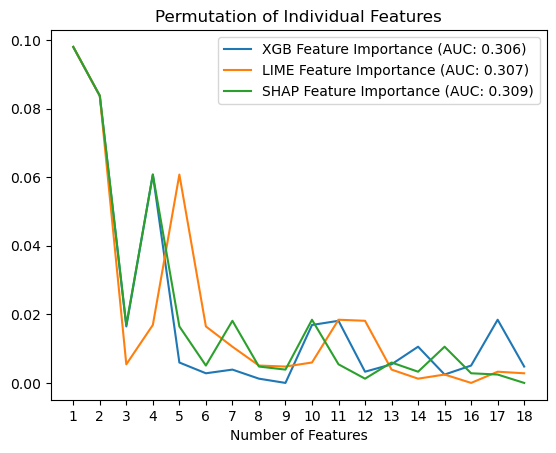

In [99]:
perm_xgb = ind_permutation(xgb_list, X_train, model, 0, std_fix=0.1, seed = 0, label = "XGB Feature Importance")
perm_lime = ind_permutation(lime_list, X_train, model, 0, std_fix=0.1, seed = 0, label= "LIME Feature Importance")
perm_shap = ind_permutation(shap_list, X_train, model, 0, std_fix=0.1, seed = 0, label= "SHAP Feature Importance")
plt.title("Permutation of Individual Features")

Text(0.5, 1.0, 'Permutation of Individual Features')

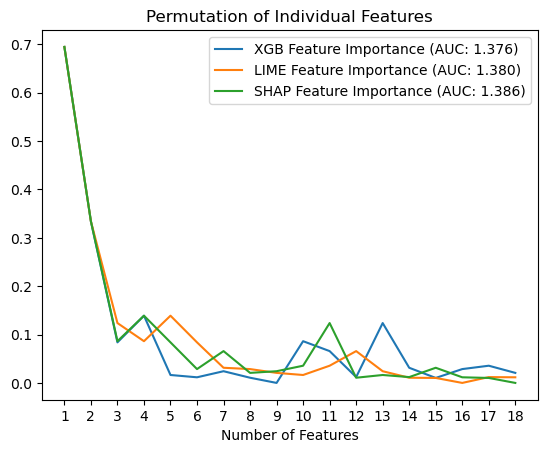

In [100]:
perm_xgb = ind_permutation(xgb_list, X_train, model, 0, std_fix=0.7, seed = 0, label = "XGB Feature Importance")
perm_lime = ind_permutation(lime_list, X_train, model, 0, std_fix=0.7, seed = 0, label= "LIME Feature Importance")
perm_shap = ind_permutation(shap_list, X_train, model, 0, std_fix=0.7, seed = 0, label= "SHAP Feature Importance")
plt.title("Permutation of Individual Features")

In [101]:
from scipy.stats import pearsonr, spearmanr 

In [102]:
# correlation of importance score with permutation result
# lime from bootstrapping
lime_scores = {
    "Feature": [
        "wind_speed", "track_distance", "rwi", "rainfall_max_6h", 
        "percent_houses_damaged_5years", "rainfall_max_24h", "total_pop", 
        "coast_length", "urban", "rural", "total_houses", "mean_elev", 
        "mean_slope", "std_tri", "water", "with_coast", "std_slope", "mean_tri"
    ],
    "Value": [
        0.545102, 0.274704, 0.178721, 0.08746, 0.082079, 0.063599, 
        0.040737, 0.037784, 0.03548, 0.026272, 0.023601, 0.022293, 
        0.019126, 0.018224, 0.016873, 0.016321, 0.016255, 0.016085
    ]
}

In [103]:
print(pearsonr(lime_scores['Value'], ind_permutation(lime_list, X_train, model, 0, std_fix=0.1, seed = 0, plot=False)))
print(pearsonr(lime_scores['Value'][1:], ind_permutation(lime_list[1:], X_train, model, 0, std_fix=0.1, seed = 0, plot=False)))

PearsonRResult(statistic=0.8508255484154732, pvalue=7.637162741823818e-06)
PearsonRResult(statistic=0.7356355718967066, pvalue=0.0007634702721217164)


In [104]:
# spearman
print(spearmanr(lime_scores['Value'], ind_permutation(lime_list, X_train, model, 0, std_fix=0.1, seed = 0, plot=False)))
print(spearmanr(lime_scores['Value'][1:], ind_permutation(lime_list[1:], X_train, model, 0, std_fix=0.1, seed = 0, plot=False)))

SignificanceResult(statistic=0.7853457172342622, pvalue=0.0001126543102925679)
SignificanceResult(statistic=0.7450980392156863, pvalue=0.0005987151981012141)


In [105]:
# shap from bootstrapping ssize = 2500
shap_scores = {
"Feature": [
        "wind_speed", "track_distance", "rainfall_max_6h", 
        "percent_houses_damaged_5years", "rainfall_max_24h", 
        "coast_length", "mean_elev", "urban", "mean_slope", 
        "total_houses", "rwi", "std_tri", "rural", "std_slope", 
        "total_pop", "mean_tri", "water", "with_coast"
    ],
    "Value": [
        1.132706, 0.191525, 0.153060, 0.146468, 0.125667, 
        0.044055, 0.035967, 0.031836, 0.029857, 0.028274, 
        0.026467, 0.021840, 0.021534, 0.015065, 0.011693, 
        0.011069, 0.010084, 0.002511
    ]
}

In [106]:
print(pearsonr(shap_scores['Value'], ind_permutation(shap_list, X_train, model, 0, std_fix=0.1, seed = 0, plot=False)))
print(pearsonr(shap_scores['Value'][1:], ind_permutation(shap_list[1:], X_train, model, 0, std_fix=0.1, seed = 0, plot=False)))

PearsonRResult(statistic=0.7841899902477502, pvalue=0.00011713672484787667)
PearsonRResult(statistic=0.8268254245920892, pvalue=4.260121109336159e-05)


In [107]:
# spearman
print(spearmanr(shap_scores['Value'], ind_permutation(shap_list, X_train, model, 0, std_fix=0.1, seed = 0, plot=False)))
print(spearmanr(shap_scores['Value'][1:], ind_permutation(shap_list[1:], X_train, model, 0, std_fix=0.1, seed = 0, plot=False)))

SignificanceResult(statistic=0.7894736842105263, pvalue=9.781072774060512e-05)
SignificanceResult(statistic=0.7500000000000001, pvalue=0.000525730789939475)


In [108]:
xgb_score = {
    "Feature": [
        "wind_speed", "track_distance", "rainfall_max_24h", 
        "percent_houses_damaged_5years", "rural", "mean_tri", 
        "mean_slope", "std_tri", "with_coast", "rainfall_max_6h", 
        "mean_elev", "std_slope", "rwi", "total_pop", 
        "water", "coast_length", "total_houses", "urban"
    ],
    "Value": [
        0.304381, 0.067105, 0.065684, 0.062669, 0.052111, 0.047929, 
        0.046492, 0.046272, 0.043027, 0.039485, 0.036126, 0.030976, 
        0.030935, 0.029661, 0.028497, 0.027574, 0.022422, 0.018654
    ]
}

pearsonr(xgb_score['Value'], ind_permutation(xgb_list, X_train, model, 0, std_fix=0.1, seed = 0, plot=False))


PearsonRResult(statistic=0.7458068743800716, pvalue=0.00038028735781753546)

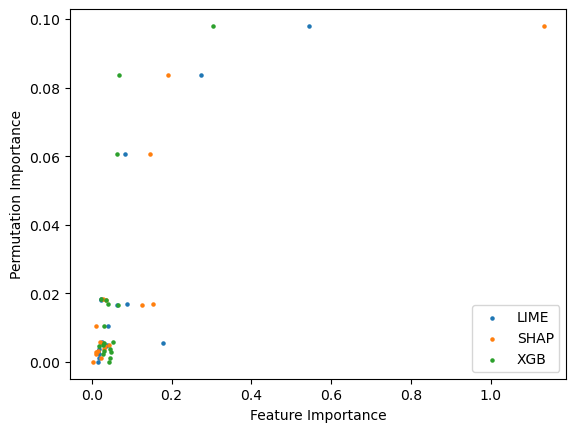

In [109]:
# plot  ind permutation result against feature importance, small dot size
import matplotlib.pyplot as plt
s= 5
plt.scatter(lime_scores['Value'], ind_permutation(lime_list, X_train, model, 0, std_fix=0.1, seed = 0, plot=False), label = "LIME", s = s)
plt.scatter(shap_scores['Value'], ind_permutation(shap_list, X_train, model, 0, std_fix=0.1, seed = 0, plot=False), label = "SHAP", s = s)
plt.scatter(xgb_score['Value'], ind_permutation(xgb_list, X_train, model, 0, std_fix=0.1, seed = 0, plot=False), label = "XGB", s = s)
plt.xlabel("Feature Importance")
plt.ylabel("Permutation Importance")
plt.legend()


Text(0.5, 1.0, 'XGB')

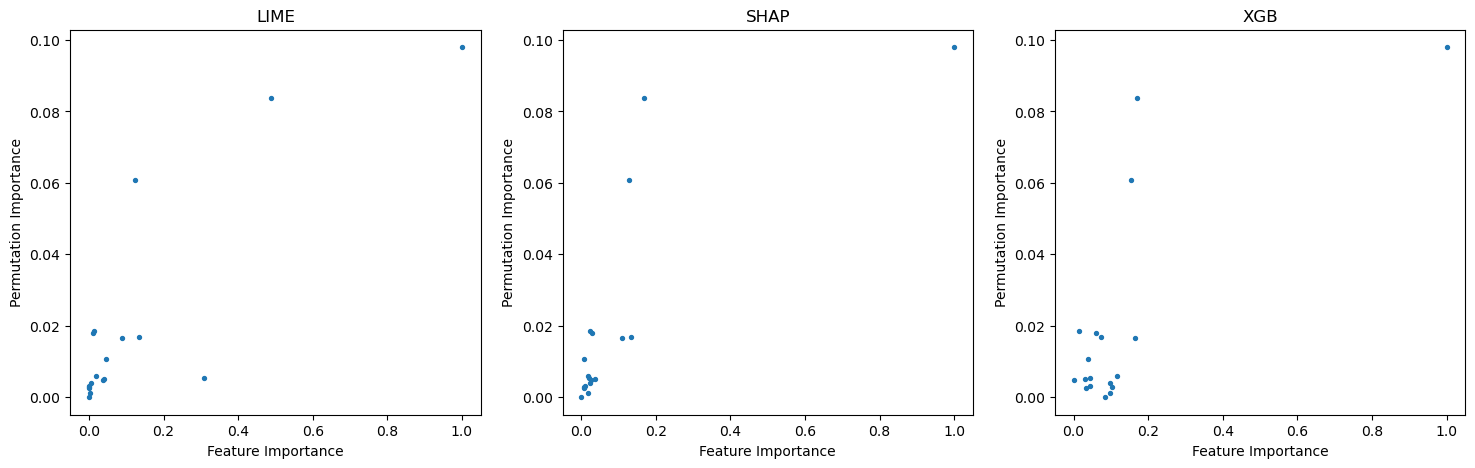

In [110]:
# plot  ind permutation result against feature importance, small dot size
# standardize feature importance first
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
lime_std = scaler.fit_transform(np.array(lime_scores['Value']).reshape(-1,1)).flatten()
shap_std = scaler.fit_transform(np.array(shap_scores['Value']).reshape(-1,1)).flatten()
xgb_std = scaler.fit_transform(np.array(xgb_score['Value']).reshape(-1,1)).flatten()

import matplotlib.pyplot as plt
s= 8

# subplots for all three
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(lime_std, ind_permutation(lime_list, X_train, model, 0, std_fix=0.1, seed = 0, plot=False), label = "LIME", s = s)
plt.xlabel("Feature Importance")
plt.ylabel("Permutation Importance")
plt.title("LIME")

plt.subplot(1,3,2)
plt.scatter(shap_std, ind_permutation(shap_list, X_train, model, 0, std_fix=0.1, seed = 0, plot=False), label = "SHAP", s = s)
plt.xlabel("Feature Importance")
plt.ylabel("Permutation Importance")
plt.title("SHAP")

plt.subplot(1,3,3)
plt.scatter(xgb_std, ind_permutation(xgb_list, X_train, model, 0, std_fix=0.1, seed = 0, plot=False), label = "XGB", s = s)
plt.xlabel("Feature Importance")
plt.ylabel("Permutation Importance")
plt.title("XGB")

In [111]:
lime_std

array([1.00000000e+00, 4.88867087e-01, 3.07430574e-01, 1.34920050e-01,
       1.24748354e-01, 8.98156392e-02, 4.65996367e-02, 4.10175854e-02,
       3.66623379e-02, 1.92564700e-02, 1.42074829e-02, 1.17349726e-02,
       5.74839750e-03, 4.04334832e-03, 1.48955516e-03, 4.46110427e-04,
       3.21350732e-04, 0.00000000e+00])

In [112]:
ind_permutation(lime_list, X_train, model, 0, std_fix=0.1, seed = 0, plot=False)

[0.097966515,
 0.08371702,
 0.0054243277,
 0.016896613,
 0.060752068,
 0.016475372,
 0.010561281,
 0.005065853,
 0.004772904,
 0.00595044,
 0.018427,
 0.018113637,
 0.0038823376,
 0.00123794,
 0.0024431946,
 0.0,
 0.0032690112,
 0.0028115502]

## Two-Stage Model

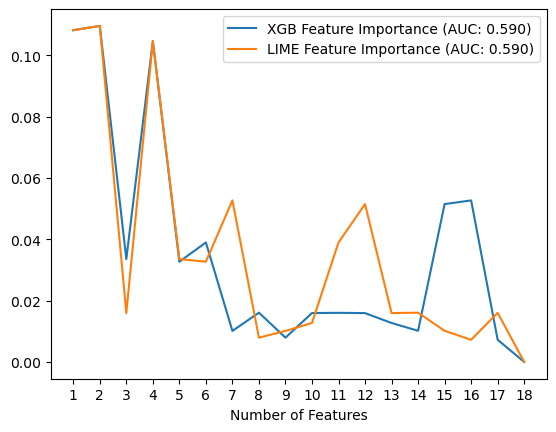

In [113]:
perm_xgb2 = ind_permutation(shap_list_xgb2, X_train, xgb2sg, 0, std_fix=0.1, seed = 0, label = "XGB Feature Importance")
perm_lime2 = ind_permutation(lime_list_xgb2, X_train, xgb2sg, 0, std_fix=0.1, seed = 0, label= "LIME Feature Importance")

In [116]:
# boostrapping
shap_scores2 = {
    "Feature": [
        "wind_speed", "track_distance", "rainfall_max_6h", 
        "percent_houses_damaged_5years", "rainfall_max_24h", 
        "coast_length", "mean_elev", "urban", "mean_slope", 
        "total_houses", "rwi", "std_tri", "rural", 
        "std_slope", "total_pop", "mean_tri", "water", 
        "with_coast"
    ],
    "Value": [
        1.380196, 0.23388, 0.202794, 0.166539, 0.143976, 
        0.056976, 0.097638, 0.070315, 0.061235, 0.03615, 
        0.040686, 0.038931, 0.040318, 0.041326, 0.034817, 
        0.045679, 0.024752, 0.001302
    ]
}

pearsonr(shap_scores['Value'], ind_permutation(shap_list_xgb2, X_train, xgb2sg, 0, std_fix=0.1, seed = 0, plot=False))

PearsonRResult(statistic=0.6282934283031667, pvalue=0.005232394821188256)

In [117]:
print(pearsonr(shap_scores2['Value'], ind_permutation(shap_list_xgb2, X_train, xgb2sg, 0, std_fix=0.1, seed = 0, plot=False)))
print(pearsonr(shap_scores2['Value'][1:], ind_permutation(shap_list_xgb2[1:], X_train, xgb2sg, 0, std_fix=0.1, seed = 0, plot=False)))

# spearman
print(spearmanr(shap_scores2['Value'], ind_permutation(shap_list_xgb2, X_train, xgb2sg, 0, std_fix=0.1, seed = 0, plot=False)))
print(spearmanr(shap_scores2['Value'][1:], ind_permutation(shap_list_xgb2[1:], X_train, xgb2sg, 0, std_fix=0.1, seed = 0, plot=False)))

PearsonRResult(statistic=0.6148668668882868, pvalue=0.0066161438398637555)
PearsonRResult(statistic=0.701988374807149, pvalue=0.0016819244278482976)
SignificanceResult(statistic=0.6119711042311662, pvalue=0.006950274712161289)
SignificanceResult(statistic=0.5416666666666667, pvalue=0.02471480173457982)


In [115]:
# bootstrapping
lime_scores2 = {
    "Feature": [
        "wind_speed", "track_distance", "rwi", 
        "percent_houses_damaged_5years", "rainfall_max_6h", 
        "rainfall_max_24h", "total_pop", "coast_length", 
        "urban", "rural", "mean_elev", "total_houses", 
        "mean_tri", "mean_slope", "std_tri", "water", 
        "std_slope", "with_coast"
    ],
    "Value": [
        0.646038, 0.288262, 0.178336, 0.095233, 0.090189, 
        0.064475, 0.041184, 0.040690, 0.040000, 0.034257, 
        0.029141, 0.023360, 0.022612, 0.021731, 0.021195, 
        0.021042, 0.020181, 0.019929
    ]
}

pearsonr(lime_scores['Value'], ind_permutation(lime_list_xgb2, X_train, xgb2sg, 0, std_fix=0.1, seed = 0, plot=False))

PearsonRResult(statistic=0.7051213323899117, pvalue=0.0010817306609694063)

In [118]:
print(pearsonr(lime_scores2['Value'], ind_permutation(lime_list_xgb2, X_train, xgb2sg, 0, std_fix=0.1, seed = 0, plot=False)))
print(pearsonr(lime_scores2['Value'][1:], ind_permutation(lime_list_xgb2[1:], X_train, xgb2sg, 0, std_fix=0.1, seed = 0, plot=False)))

# spearman
print(spearmanr(lime_scores2['Value'], ind_permutation(lime_list_xgb2, X_train, xgb2sg, 0, std_fix=0.1, seed = 0, plot=False)))
print(spearmanr(lime_scores2['Value'][1:], ind_permutation(lime_list_xgb2[1:], X_train, xgb2sg, 0, std_fix=0.1, seed = 0, plot=False)))


PearsonRResult(statistic=0.6935124197347126, pvalue=0.001413926525325469)
PearsonRResult(statistic=0.6358344813945919, pvalue=0.006079884911811687)
SignificanceResult(statistic=0.6243550051599587, pvalue=0.0056112726298920695)
SignificanceResult(statistic=0.556372549019608, pvalue=0.02037058662451899)
